In [1]:
%matplotlib inline

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import progressbar 

In [3]:
def bokuToCumSum(df):
    df["date"] = pd.to_datetime(df.datetime)
    df2 = pd.DataFrame()
    df2["date"] = df["date"]  
    df2 = df.groupby(df.date).mean()
    df2.reset_index(inplace=True)
    df2['cumsumN2O'] = df2.groupby(pd.Grouper(key='date', freq='Y'))["dN_n2o_emis[kgNha-1]"].cumsum()
    return df2

def bokuToCumSum2(df):
    df["date"] = pd.to_datetime(df.datetime)
    df2 = pd.DataFrame()
    df2["date"] = df["date"]  
    df2 = df.groupby(df.date).mean()
    df2.reset_index(inplace=True)
    df2 = df2.groupby(pd.Grouper(key='date', freq='Y')).cumsum()
    return df2

In [163]:
path = "/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out/"



## Read all 500 LandscapeDNDC result files and aggregate N2O data into solumns in one file 

In [132]:


# MARCHFELD
scenario = "AT_marchfeld_output"

dfall = pd.DataFrame()
filename = f"{path}/{scenario}/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_000_soilchemistry-daily.txt"
df = pd.read_csv(filename, sep="\t")[["source", "id", "datetime", "dN_n2o_emis[kgNha-1]"]]
#print( df.groupby(df.datetime).last().index  )
dfall["datetime"] = df.groupby(df.datetime).last().index  
dfall.set_index("datetime", inplace = True)
for i in range(500):
    filename = f"{path}/{scenario}/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_{i:03d}_soilchemistry-daily.txt"
    print(filename)
    df = pd.read_csv(filename, sep="\t")[["source", "id", "datetime", "dN_n2o_emis[kgNha-1]"]]
    df2 = df.groupby(df.datetime).mean()
    #print(df2.head()) 
    dfall[i] = df2[["dN_n2o_emis[kgNha-1]"]]
#
print( dfall.head() )
dfall.to_csv(f"{path}/{scenario}/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_n2o.csv")


del dfall 



/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_000_soilchemistry-daily.txt
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_001_soilchemistry-daily.txt
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_002_soilchemistry-daily.txt
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_003_soilchemistry-daily.txt
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_004_soilchemistry-daily.txt
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersd

In [130]:
# STM
scenario = "AT_stmkost_output"
dfLIST = []

dfall = pd.DataFrame()
filename = f"{path}/{scenario}/AT_stmkost-losa-a_konv-43022-hartberg_000_soilchemistry-daily.txt"
df = pd.read_csv(filename, sep="\t")[["source", "id", "datetime", "dN_n2o_emis[kgNha-1]"]]
dfall["datetime"] = df.groupby(df.datetime).last().index  
dfall.set_index("datetime", inplace = True)
for i in range(500):
    filename = f"{path}/{scenario}/AT_stmkost-losa-a_konv-43022-hartberg_{i:03d}_soilchemistry-daily.txt"
    print(filename)
    df = pd.read_csv(filename, sep="\t")[["source", "id", "datetime", "dN_n2o_emis[kgNha-1]"]]
    df2 = df.groupby(df.datetime).mean()
    dfall[i] = df2[["dN_n2o_emis[kgNha-1]"]]
#
print( dfall.head() )
dfall.to_csv(f"{path}/{scenario}/AT_stmkost-losa-a_konv-43022-hartberg_n2o.csv")
del dfall 


/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_000_soilchemistry-daily.txt
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_001_soilchemistry-daily.txt
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_002_soilchemistry-daily.txt
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_003_soilchemistry-daily.txt
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_004_soilchemistry-daily.txt
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_005_soilchemistry-daily.txt
/pd/data/bio/haas/Projects/BOKU/ldndc-Ev

## Create the cumulative sum of the raw n2o data

In [75]:
Files = {}

Sites = ["AT_gk", "AT_mf", "AT_st"]
Files["AT_gk"] = f"{path}/AT_grieskirchen_output/AT_grieskirchen-silt-a_konv-34016-kremsmuenster_n2o.csv" 
Files["AT_mf"] = f"{path}/AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_n2o.csv"
Files["AT_st"] = f"{path}/AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_n2o.csv"

for site in Sites:
    print(site)
    df = pd.read_csv(Files[site], sep=",")
    df["date"] = pd.to_datetime(df["datetime"])
    dfcumsum = df.groupby(df.date.dt.year).cumsum()
    dfcumsum["date"] = df["date"]
    #plt.plot(dfcumsum["date"], dfcumsum.columns[1:])
    print(dfcumsum.head())
    filename = Files[site][:-4] + "_cumsum.csv"
    print(filename)
    dfcumsum.to_csv(filename)
    dfyearly = dfcumsum.groupby(dfcumsum.date.dt.year).last()
    print(dfyearly.head())
    filename = Files[site][:-4] + "_yearly.csv"
    print(filename)
    dfyearly.to_csv(filename)
    
    

AT_gk
          0         1         2         3         4         5         6  \
0  0.000128  0.000046  0.000115  0.000133  0.000193  0.000019  0.000167   
1  0.000206  0.000147  0.000236  0.000223  0.000318  0.000045  0.000282   
2  0.000275  0.000284  0.000377  0.000297  0.000434  0.000071  0.000382   
3  0.000334  0.000447  0.000532  0.000375  0.000528  0.000099  0.000481   
4  0.000391  0.000629  0.000704  0.000458  0.000618  0.000130  0.000584   

          7         8         9  ...       491       492       493       494  \
0  0.000284  0.000355  0.000146  ...  0.000132  0.000152  0.000248  0.000218   
1  0.000459  0.000563  0.000254  ...  0.000212  0.000263  0.000401  0.000378   
2  0.000608  0.000733  0.000343  ...  0.000273  0.000372  0.000520  0.000526   
3  0.000738  0.000882  0.000432  ...  0.000330  0.000465  0.000636  0.000676   
4  0.000865  0.001026  0.000522  ...  0.000389  0.000555  0.000754  0.000835   

        495       496       497       498       499       date

In [31]:
!ls -lrt projects/regional/Modell_In_Out/AT_gr*/*csv

-rw-r--r-- 1 haas Domain Users 40937874 18. Jan 13:55 projects/regional/Modell_In_Out/AT_grieskirchen_output/AT_grieskirchen-silt-a_konv-34016-kremsmuenster_n2o.csv
-rw-r--r-- 1 haas Domain Users 41412330 21. Jan 15:50 projects/regional/Modell_In_Out/AT_grieskirchen_output/AT_grieskirchen-silt-a_konv-34016-kremsmuenster_n2o_cumsum.csv
-rw-r--r-- 1 haas Domain Users   112654 21. Jan 15:50 projects/regional/Modell_In_Out/AT_grieskirchen_output/AT_grieskirchen-silt-a_konv-34016-kremsmuenster_n2o_yearly.csv


In [32]:
!ls -lrt projects/regional/Modell_In_Out/AT_ma*/*csv

-rw-r--r-- 1 haas Domain Users 47055053 18. Jan 13:52 projects/regional/Modell_In_Out/AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_n2o.csv
-rw-r--r-- 1 haas Domain Users 42632920 21. Jan 15:50 projects/regional/Modell_In_Out/AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_n2o_cumsum.csv
-rw-r--r-- 1 haas Domain Users   133761 21. Jan 15:50 projects/regional/Modell_In_Out/AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_n2o_yearly.csv


In [33]:
!ls -lrt projects/regional/Modell_In_Out/AT_st*/*csv

-rw-r--r-- 1 haas Domain Users 40938834 18. Jan 13:36 projects/regional/Modell_In_Out/AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_n2o.csv
-rw-r--r-- 1 haas Domain Users 41088931 21. Jan 15:50 projects/regional/Modell_In_Out/AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_n2o_cumsum.csv
-rw-r--r-- 1 haas Domain Users   113045 21. Jan 15:50 projects/regional/Modell_In_Out/AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_n2o_yearly.csv


## Plot violine plots from the yearly emissions across all 500 uncertyinty analysis simulations

We use the matplotlib pyplot library violinplot and the searborne sns library violinplot funtions 

AT_gk
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_grieskirchen_output/AT_grieskirchen-silt-a_konv-34016-kremsmuenster_n2o_yearly.csv
AT_gk_n2o-violine_PLT.pdf


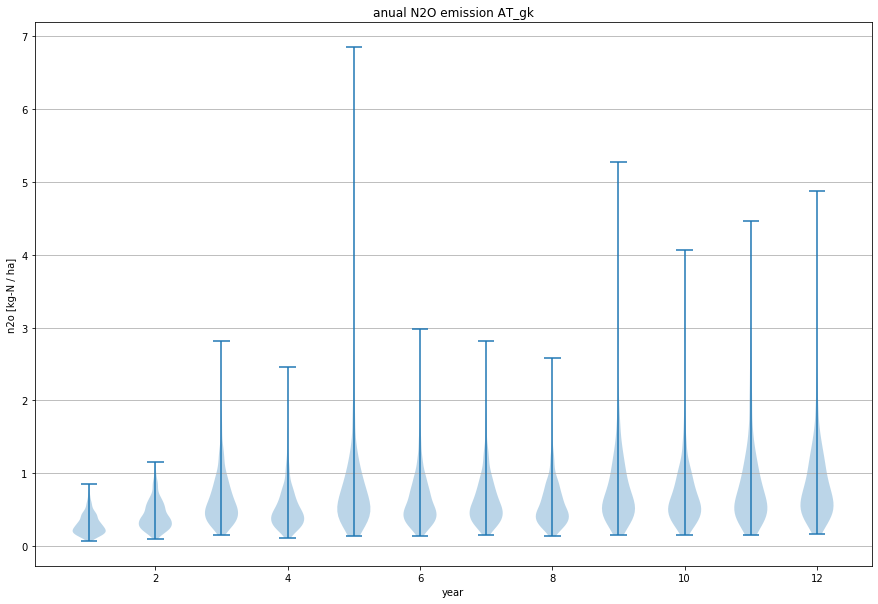

AT_gk_n2o-violine_SNS.pdf


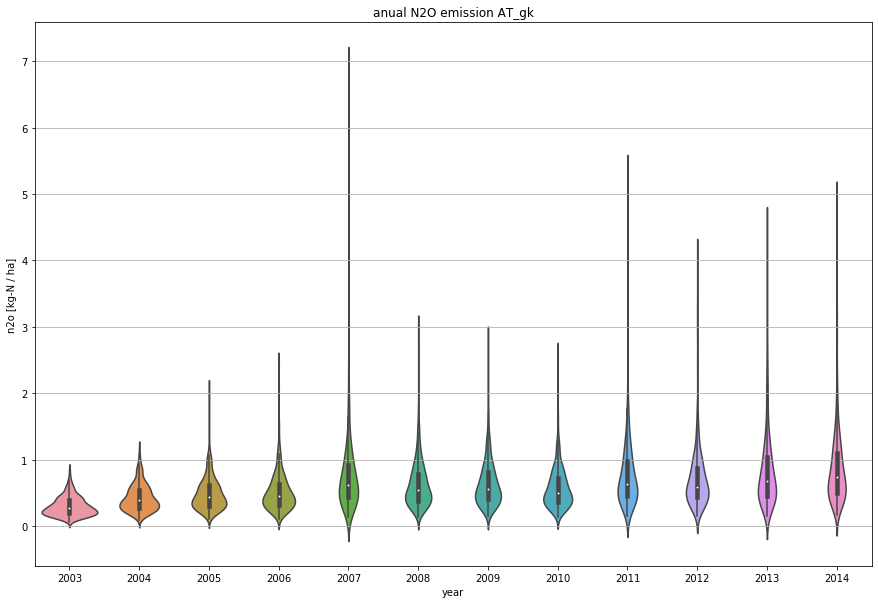

AT_mf
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_n2o_yearly.csv
AT_mf_n2o-violine_PLT.pdf


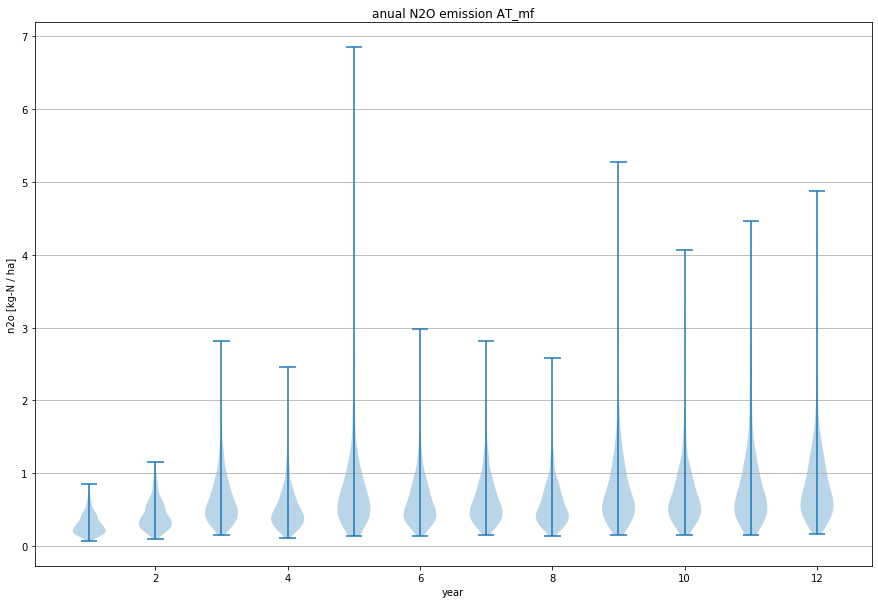

AT_mf_n2o-violine_SNS.pdf


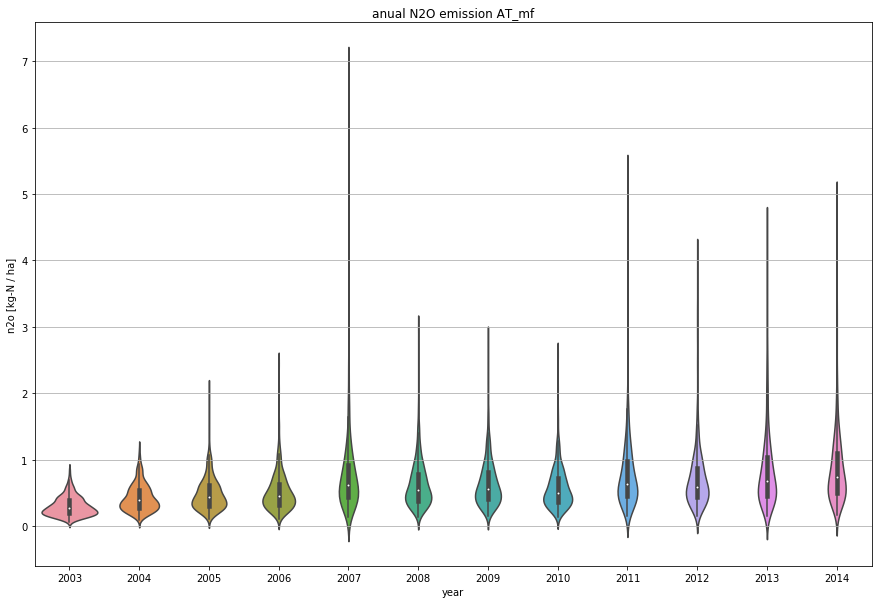

AT_st
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_n2o_yearly.csv
AT_st_n2o-violine_PLT.pdf


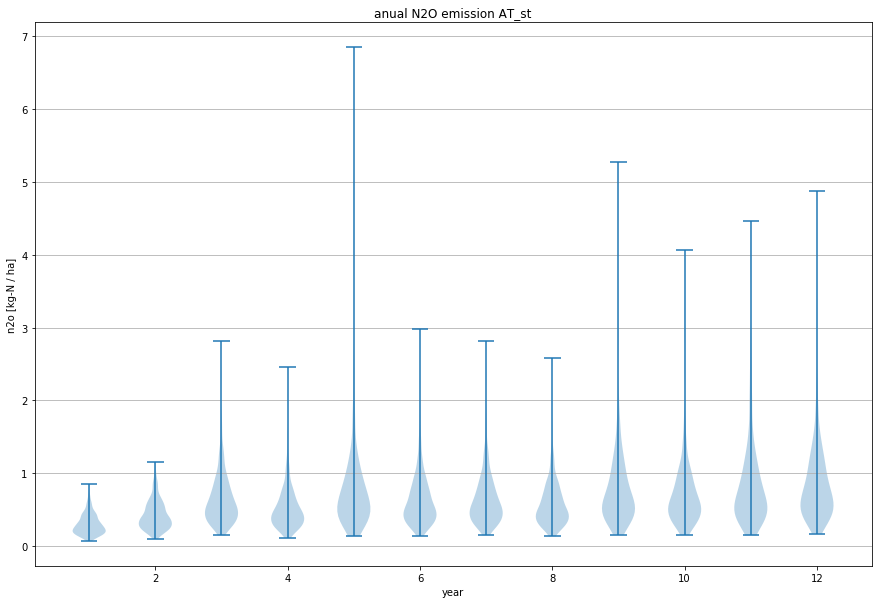

AT_st_n2o-violine_SNS.pdf


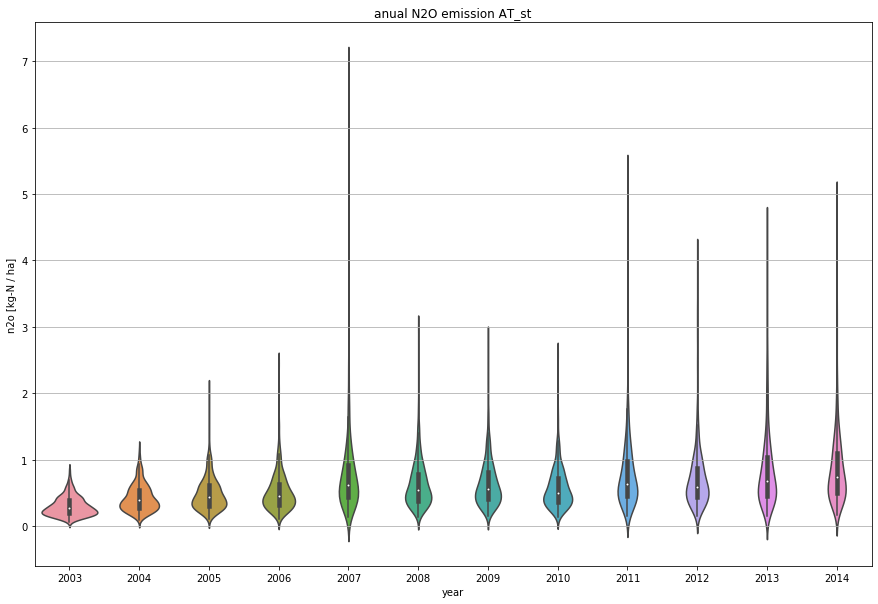

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plotViolinsPLT(dfall, name, filename):
    fig, axes = plt.subplots()
    dataset = [dfall[dfall.date == 2003]["n2o"].values, 
               dfall[dfall.date == 2004]["n2o"].values, 
               dfall[dfall.date == 2009]["n2o"].values,
               dfall[dfall.date == 2006]["n2o"].values, 
               dfall[dfall.date == 2007]["n2o"].values, 
               dfall[dfall.date == 2008]["n2o"].values, 
               dfall[dfall.date == 2009]["n2o"].values,
               dfall[dfall.date == 2010]["n2o"].values,
               dfall[dfall.date == 2011]["n2o"].values,
               dfall[dfall.date == 2012]["n2o"].values,
               dfall[dfall.date == 2013]["n2o"].values,
               dfall[dfall.date == 2014]["n2o"].values ]
    axes.violinplot( dataset)
    axes.set_title(f'anual N2O emission {site}')
    axes.yaxis.grid(True)
    axes.set_xlabel('year')
    axes.set_ylabel('n2o [kg-N / ha]')
    fig.set_figheight(10)
    fig.set_figwidth(15)
    plt.savefig(filename)
    print(filename)
    plt.show()
#

def plotViolinsSNS(dfall, name, filename):
    fontsize = 12
    fig, axes = plt.subplots()
    sns.violinplot('date','n2o', data=dfall, ax = axes)
    axes.set_title(f'anual N2O emission {site}')
    axes.yaxis.grid(True)
    axes.set_xlabel('year')
    axes.set_ylabel('n2o [kg-N / ha]')
    fig.set_figheight(10)
    fig.set_figwidth(15)
    plt.savefig(filename)
    print(filename)
    plt.show()
#    

Sites = ["AT_gk", "AT_mf", "AT_st"]
Files = {}
Files["AT_gk"] = f"{path}/AT_grieskirchen_output/AT_grieskirchen-silt-a_konv-34016-kremsmuenster_n2o_yearly.csv" 
Files["AT_mf"] = f"{path}/AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_n2o_yearly.csv"
Files["AT_st"] = f"{path}/AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_n2o_yearly.csv"

for site in Sites:
    print(site)
    filename = Files[site]
    print(filename)
    dfyearly = pd.read_csv(filename, sep=",")
    dfyearly.set_index("date", inplace=True)
    dfyearly.drop(columns="date.1", inplace=True)
    #print(dfyearly.head(n=1) ) 
    dfall = pd.DataFrame()
    dfList = []
    for i in range(2003,2015):
        df = pd.DataFrame()
        df["n2o"]=dfGKyearly.loc[i].values
        df = df[~np.isnan(df["n2o"])]
        df["date"]=int(i)
        dfList.append(df)
    dfall = pd.concat(dfList, axis=0)
    plotViolinsPLT(dfall, site, site+"_n2o-violine_PLT.pdf")
    plotViolinsSNS(dfall, site, site+"_n2o-violine_SNS.pdf")




## Create plots of the cumulative sums, with all 500 uncertainty analysis results and one plot only with the statistics  

AT_gk
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_grieskirchen_output/AT_grieskirchen-silt-a_konv-34016-kremsmuenster_n2o_cumsum.csv
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_grieskirchen_output/AT_grieskirchen-silt-a_konv-34016-kremsmuenster_soilchemistry-daily.txt


/app/python-anaconda-3.7/gnu-4.8.5/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/app/python-anaconda-3.7/gnu-4.8.5/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/app/python-anaconda-3.7/gnu-4.8.5/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


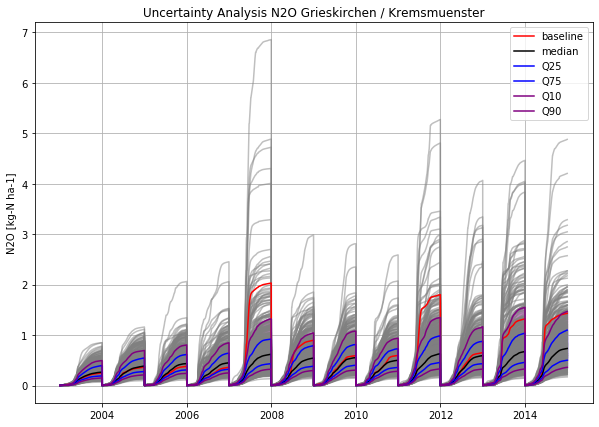

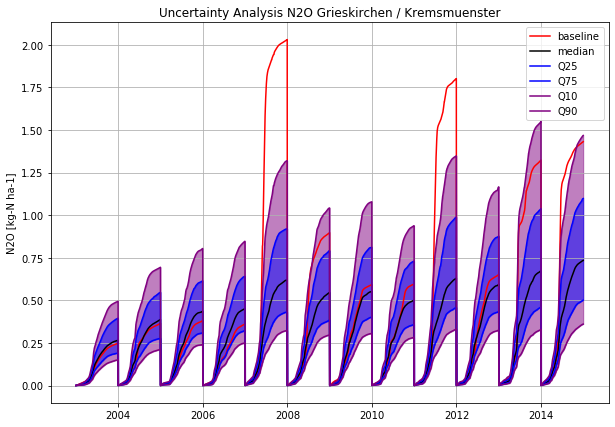

AT_mf
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_n2o_cumsum.csv
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_soilchemistry-daily.txt


/app/python-anaconda-3.7/gnu-4.8.5/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/app/python-anaconda-3.7/gnu-4.8.5/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/app/python-anaconda-3.7/gnu-4.8.5/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


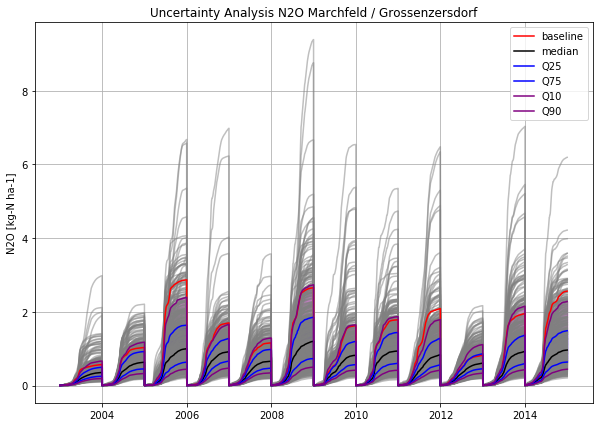

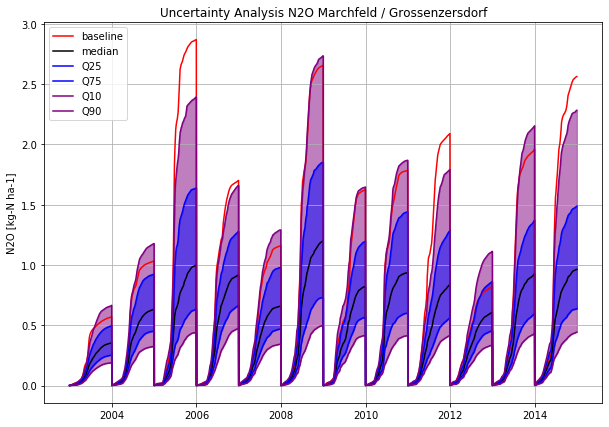

AT_st
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_n2o_cumsum.csv
/pd/data/bio/haas/Projects/BOKU/ldndc-Eval/projects/regional/Modell_In_Out//AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_soilchemistry-daily.txt


/app/python-anaconda-3.7/gnu-4.8.5/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/app/python-anaconda-3.7/gnu-4.8.5/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/app/python-anaconda-3.7/gnu-4.8.5/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


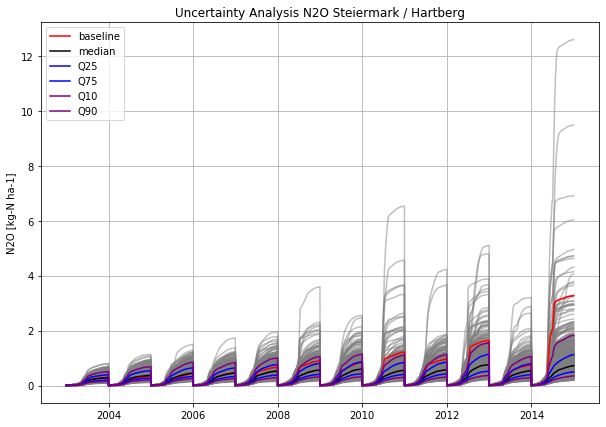

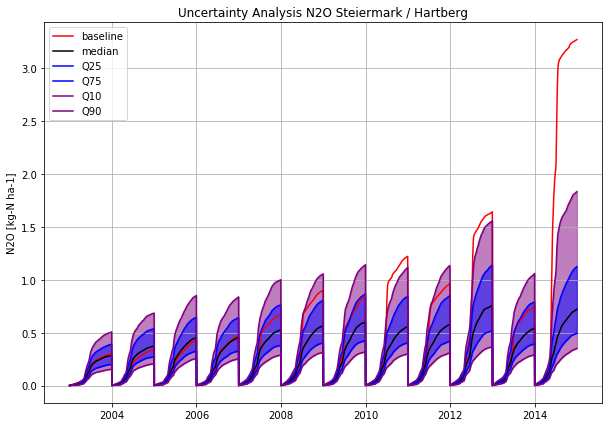

In [160]:
def plotCumSumAll(fileCS, fileBa, site, name, filename):
    plt.figure(figsize=(10,7))
    
    df = pd.read_csv(fileBa, sep="\t")[["source", "id", "datetime", "dN_n2o_emis[kgNha-1]"]]
    #print(df.head(n=1))
    dfBase = bokuToCumSum2(df)
    bar = progressbar.ProgressBar(maxval= 501).start()
    #print(dfBase)
    filename = f"{fileCS}"
    dfStat = pd.read_csv(filename, sep=",")
    dfStat["datetime"] = dfStat.date
    dfStat.drop(columns=['Unnamed: 0','date'], inplace=True)
    dfStat["date"] = pd.to_datetime(dfStat.datetime)
    dfBase["date"] = dfStat["date"]  
    for i in range(500):
        bar.update(i)
        plt.plot(dfStat.date, dfStat[str(i)], color="grey", alpha=0.5)
    #
    plt.fill_between(dfStat.date, dfStat.quantile(axis=1,q=.10), y2=dfStat.quantile(axis=1,q=.90), color="purple", alpha=0.5)
    plt.fill_between(dfStat.date, dfStat.quantile(axis=1,q=.25), y2=dfStat.quantile(axis=1,q=.75), color="blue", alpha=0.5)
    plt.plot(dfBase.date, dfBase["dN_n2o_emis[kgNha-1]"], color="red", label="baseline")
    plt.plot(dfStat.date, dfStat.median(axis=1), color="black", alpha=1, label="median")
    plt.plot(dfStat.date, dfStat.quantile(axis=1,q=.25), color="blue",  label="Q25")
    plt.plot(dfStat.date, dfStat.quantile(axis=1,q=.75), color="blue",  label="Q75")
    plt.plot(dfStat.date, dfStat.quantile(axis=1,q=.10), color="purple", label="Q10")
    plt.plot(dfStat.date, dfStat.quantile(axis=1,q=.90), color="purple", label="Q90")
    plt.title(f"Uncertainty Analysis N2O {name}")
    plt.ylabel("N2O [kg-N ha-1]")
    plt.legend()
    plt.grid()
    plt.savefig(f"fig_{site}_N2O_cumsum_all.pdf")
    plt.show()
#

def plotCumSumStats(fileCS, fileBa, site, name, filename):
    plt.figure(figsize=(10,7))
    
    df = pd.read_csv(fileBa, sep="\t")[["source", "id", "datetime", "dN_n2o_emis[kgNha-1]"]]
    #print(df.head(n=1))
    dfBase = bokuToCumSum2(df)
    bar = progressbar.ProgressBar(maxval= 501).start()
    #print(dfBase)
    filename = f"{fileCS}"
    dfStat = pd.read_csv(filename, sep=",")
    dfStat["datetime"] = dfStat.date
    dfStat.drop(columns=['Unnamed: 0','date'], inplace=True)
    dfStat["date"] = pd.to_datetime(dfStat.datetime)
    dfBase["date"] = dfStat["date"]  
    plt.fill_between(dfStat.date, dfStat.quantile(axis=1,q=.10), y2=dfStat.quantile(axis=1,q=.90), color="purple", alpha=0.5)
    plt.fill_between(dfStat.date, dfStat.quantile(axis=1,q=.25), y2=dfStat.quantile(axis=1,q=.75), color="blue", alpha=0.5)
    plt.plot(dfBase.date, dfBase["dN_n2o_emis[kgNha-1]"], color="red", label="baseline")
    plt.plot(dfStat.date, dfStat.median(axis=1), color="black", alpha=1, label="median")
    plt.plot(dfStat.date, dfStat.quantile(axis=1,q=.25), color="blue",  label="Q25")
    plt.plot(dfStat.date, dfStat.quantile(axis=1,q=.75), color="blue",  label="Q75")
    plt.plot(dfStat.date, dfStat.quantile(axis=1,q=.10), color="purple", label="Q10")
    plt.plot(dfStat.date, dfStat.quantile(axis=1,q=.90), color="purple", label="Q90")
    plt.title(f"Uncertainty Analysis N2O {name}")
    plt.ylabel("N2O [kg-N ha-1]")
    plt.legend()
    plt.grid()
    plt.savefig(f"fig_{site}_N2O_cumsum_stats.pdf")
    plt.show()
#

Sites = ["AT_gk", "AT_mf", "AT_st"]
FilesCS = {}
FilesCS["AT_gk"] = f"{path}/AT_grieskirchen_output/AT_grieskirchen-silt-a_konv-34016-kremsmuenster_n2o_cumsum.csv" 
FilesCS["AT_mf"] = f"{path}/AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_n2o_cumsum.csv"
FilesCS["AT_st"] = f"{path}/AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_n2o_cumsum.csv"

FilesBA = {}
FilesBA["AT_gk"] = f"{path}/AT_grieskirchen_output/AT_grieskirchen-silt-a_konv-34016-kremsmuenster_soilchemistry-daily.txt" 
FilesBA["AT_mf"] = f"{path}/AT_marchfeld_output/AT_marchfeld-konvC-losi-a-70250-grossenzersdorf_soilchemistry-daily.txt"
FilesBA["AT_st"] = f"{path}/AT_stmkost_output/AT_stmkost-losa-a_konv-43022-hartberg_soilchemistry-daily.txt"

Names = {}
Names["AT_gk"] = "Grieskirchen / Kremsmuenster" 
Names["AT_mf"] = "Marchfeld / Grossenzersdorf"
Names["AT_st"] = "Steiermark / Hartberg"

for site in Sites: 
    print(site)
    print(FilesCS[site])
    print(FilesBA[site])
    plotCumSumAll(FilesCS[site], FilesBA[site], site, Names[site], site+".pdf")
    plotCumSumStats(FilesCS[site], FilesBA[site], site, Names[site], site+".pdf")
    
    